In [40]:
import pandas as pd
import sklearn as sk
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [41]:
y= pd.read_csv("AAPL_quarterly_financials.csv")

In [42]:
y.index = y.name

In [43]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [44]:
y.index = pd.to_datetime(y.index)

In [45]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [46]:
from pytrends.request import TrendReq

In [47]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone","Recesssion" , "Samsung" , "Interest Rates" , "New Phone" , "Buy iPhone" , "Sell iPhone" , "Taylor Swift Tickets" ,"Hospital" , "UCLA"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]
df

,iPhone,Recesssion,Samsung,Interest Rates,New Phone,Buy iPhone,Sell iPhone,Taylor Swift Tickets,Hospital,UCLA
date,,,,,,,,,,
2004-01-01,0,0,26,60,51,0,0,0,80,99
2004-02-01,0,66,23,58,48,0,0,0,78,79
2004-03-01,0,67,25,67,45,0,3,0,80,87
2004-04-01,0,0,23,71,49,0,2,0,72,98
2004-05-01,0,0,24,64,48,0,0,0,70,83
...,...,...,...,...,...,...,...,...,...,...
2023-09-01,66,7,56,75,90,45,42,23,84,40
2023-10-01,52,12,56,70,84,34,34,27,82,46
2023-11-01,49,9,59,70,76,33,30,35,80,45


In [48]:
df = df.resample("Q").mean()
df

,iPhone,Recesssion,Samsung,Interest Rates,New Phone,Buy iPhone,Sell iPhone,Taylor Swift Tickets,Hospital,UCLA
date,,,,,,,,,,
2004-03-31,0.000000,44.333333,24.666667,61.666667,48.000000,0.000000,1.000000,0.000000,79.333333,88.333333
2004-06-30,0.000000,0.000000,24.000000,66.000000,49.000000,0.000000,0.666667,0.000000,73.666667,85.333333
2004-09-30,0.000000,0.000000,27.666667,53.333333,51.333333,0.000000,0.666667,0.000000,80.333333,78.000000
2004-12-31,0.000000,22.333333,30.000000,46.000000,46.000000,0.000000,0.000000,0.000000,73.000000,85.333333
2005-03-31,0.000000,0.000000,27.333333,47.666667,44.333333,0.000000,0.000000,0.000000,77.333333,83.333333
...,...,...,...,...,...,...,...,...,...,...
2023-03-31,48.666667,12.000000,55.000000,84.000000,76.333333,25.333333,25.000000,13.333333,79.333333,41.000000
2023-06-30,43.666667,10.333333,52.333333,74.000000,72.666667,22.333333,25.000000,52.333333,79.666667,29.333333
2023-09-30,54.000000,7.000000,57.333333,75.000000,83.666667,30.666667,32.333333,56.333333,83.666667,30.000000


In [50]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
X_scaled = scaler.fit_transform(X)

/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [72]:
print(X_scaled.shape)
print(y.shape)

(79, 10)
(79, 1)


In [73]:
from sklearn.linear_model import Lasso

In [87]:
lasso= Lasso (alpha = .5)

In [88]:
lasso.fit (X_scaled,y)

/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Lasso(alpha=0.5)

In [89]:
coefficients = lasso.coef_

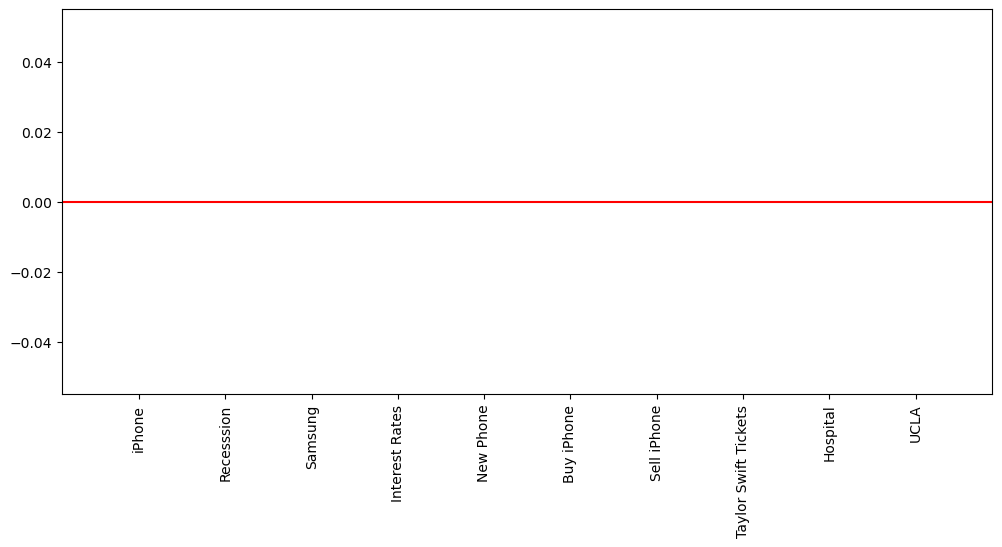

In [90]:
columns = X.columns

plt.figure(figsize=(12, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), columns, rotation='vertical')  # Label x-axis ticks with column names
plt.axhline(0, color="red")
plt.show()

# Let's try a different Lambda, set a = .01

/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dynasty/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


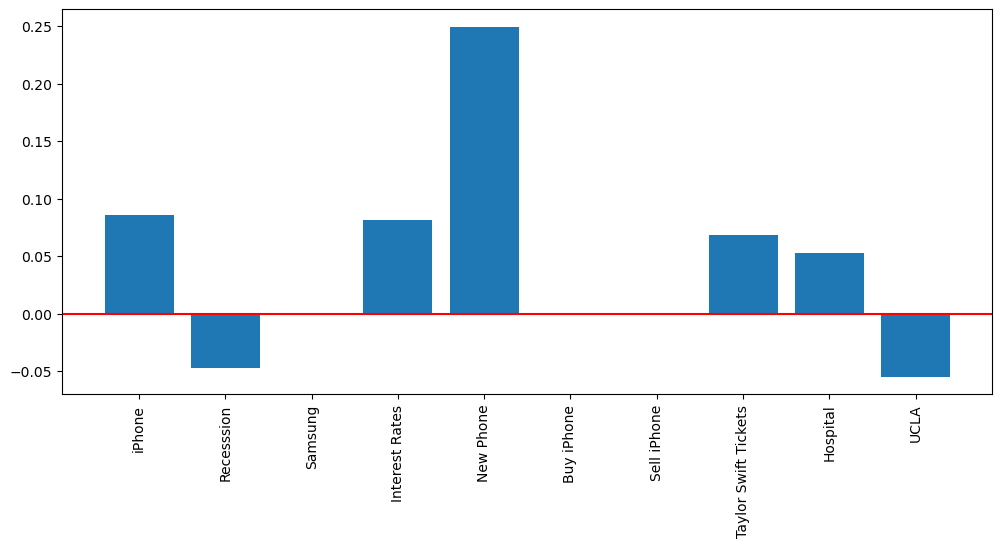

In [93]:
lasso= Lasso (alpha = .01)
lasso.fit (X_scaled,y)
coefficients = lasso.coef_
columns = X.columns

plt.figure(figsize=(12, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), columns, rotation='vertical')  # Label x-axis ticks with column names
plt.axhline(0, color="red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

In Lasso regression, the regularization term encourages sparsity in the model by penalizing the absolute values of the coefficients.

The regularization term encourages some coefficients to be exactly zero, effectively performing variable selection.
If the magnitude of some coefficients is very small or exactly zero, such as Samsung, Buy Iphone, Sell iPhone here, it indicates that the corresponding features may not be important in predicting the target variable.
The model has a few non-zero coefficients after Lasso regularization, it suggests that these features play a more significant role in predicting the outcome.

Increasing the alpha parameter in Lasso regression increases the strength of the regularization penalty.
If the coefficient magnitudes decrease as you increase alpha, it suggests that the regularization is having an impact, potentially shrinking less important coefficients toward zero. The example is what we did here to change a = 0.5 to a = 0.01